# This notebook explains the sector classification process
The files mentioned below can be found in this folder.

## Get a refined dictionary for project description corpus
First, we use nltk package to split project description strings into single words, get the postag of each word, remove all the stopwords and lemmatize the words,then get a list of words, which is the first version of dictionary. 

<font color = yellow > *csv file containing projection descriptions:*</font> <font color = pink> **pro_desc.csv**</font>

This dictionary, denoted by D1, contains many tokens which are non English words, for example: "rd", "imed". So we use a dictionary consisting of English words, denoted by ED (shorthand for English Dictionary), to find which words in D1 are also in ED. But among those non-English words, there are many consisting of two English words, for example, "suchevidence", "fullywithdrawn". It takes much time to separate all those composition words. So we choose to only separate those words contributing to the classification of sectors.

We found the descriptions of different sectors from the world bank website: [World_bank_website](https://projects.worldbank.org/en/projects-operations/project-sector?lang=en&page=), and try to separate words containing any word which appears in those descriptions. After above preprocessing, we have a dictionary of around 45000 words saved in a csv file together with its frequency, whether it is in ED, and its postag. 

<font color = yellow> *python file to get the dictionary:* </font> <font color = pink> **refined_dic_python_file**</font> 

<font color = yellow> *csv file of this dictionary:* </font> <font color = pink> **dictionary_csv**</font>

The size of dictionary is still large, so we reduce the size one more time by only including the nouns and adjectives. Now the size of this dictionary is around 6000.

<font color = yellow> *dictionary which only contains words in ED which is noun or adj:* </font> <font color = pink> **in_word_n_adj_csv**</font>

<font color = yellow> *Python code to get above dictionary:* </font> <font color = pink> **glove.py**</font>

<font color = yellow> *the dictionary:* </font> <font color = pink> **refined_common_dic.csv**


## Use pre-trained Glove word embeddings to get an embedding for each document
Here we use the Glove word embedding of dimension 300 trained from Wikipedia, [Glove6B](https://nlp.stanford.edu/projects/glove/). We choose 300 dimension because it gives best clustering results among all other dimensions. The Euclidean distance between two word vectors provides an effective method for measuring the semantic similarity of the corresponding words. 

The embedding vector for a single document is computed as the average of vectors of words in both this projection description and the common dictionary. Also we get an embedding vector for each sector using the description mentioned above provided by world bank.

<font color = yellow> *Python code to get the document embedding:* </font> <font color = pink> **doc_embedding.py**</font>

<font color = yellow> *The csv file storing the doc embedding:* </font> <font color = pink> **glove_coef.csv**</font>

<font color = yellow> *The csv file storing the sector description embedding:* </font> <font color = pink> **refined_sec_glove_coef.csv**</font>




## Use k-mean to get the clustering
Because we would like to have 11 sector clusters. KMeans is fast and is easy to control the size of clusters. And we use TNSE for visualization.

We use TNSE to find the projection of these vectors to 2d plane, there is some cluster showing. In the picture below, the yellow points are each document and the other colored points are vectors representing sector descriptions from world bank.

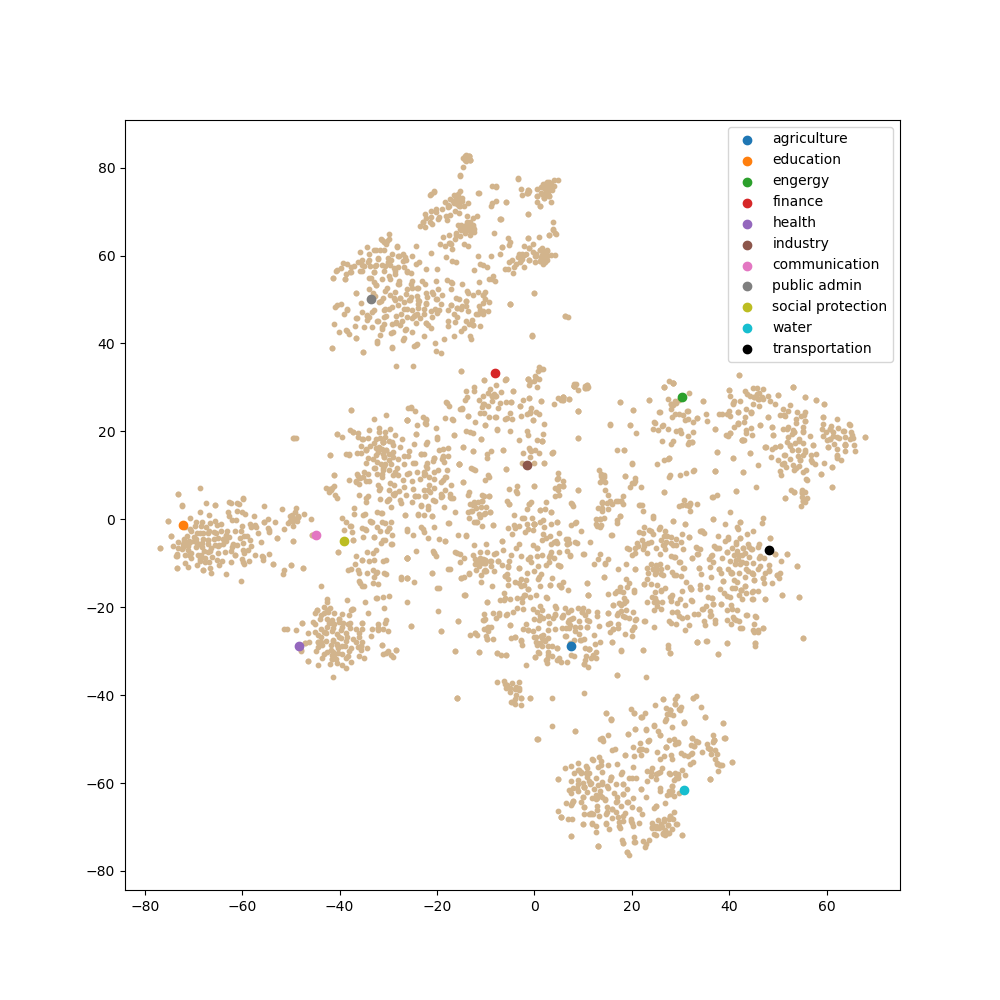

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 


Image(filename ="refined_glove_sec_tnes.png", width=700, height=700)


<font color = yellow> *python code to perfom TNSE* </font> <font color = pink> **tnse.py**</font>

<font color = yellow> *2 dimensional vectors obtained for TNSE* </font> <font color = pink> **refined_glove_sec_tnse.csv**</font>

<font color = yellow> *plotting code for tnse vectors* </font> <font color = pink> **plot_sec.py**</font>

## Details of K-Means implementation
We require the K-Means algorithm to have 11 clusters. If a doc is inside the same cluster as the sector description from world bank website, then the doc is classified as in that sector.

The cluster result is slightly different for each run of K-Mean. So we run K-Mean 500 times to get the probability distribution of each doc in different sectors, and we choose the sector with highest probability as the sector for the documents.

<font color = yellow> *python code to perform K-mean* </font> <font color = pink> **multi_k_mean.py**</font>

<font color = yellow> *sector distribution for each doc* </font> <font color = pink> **freq.csv**</font>

<font color = yellow> *assigne sector to each document* </font> <font color = pink> **new_accuracy_kmean.py]**</font>

<font color = yellow> *csv storing sector classification* </font> <font color = pink> **sector_classification.csv**</font>


## Cluster results of KMeans
The 11 sectors provided by world banks:
* Agriculture
* Education
* Energy & Extractive
* Financial Sector
* Health
* Industry & Trader/Ser
* Infor & communication
* Public Admin
* Social Protection
* Transportation
* Water/Saint/Waste

#### Result analysis of KMeans: 
* The sector Health and Social Protection can not be distinguished. To be more precise, the sector descriptions for health and social protection are always in the same cluster.
* There are around 200 documents which are not classified in any sector. If for each K-mean, there is some cluster which contains no sector descriptions, then the docs in this cluster are "not_classified". Because of the non-distinction of health and social protection, there are always some docs which are not classified.
* Infor&Communication sector has most documents, around 453.

#### Accuracy of classification:
* We sampled 20 projection descriptions, try to classify sectors manually. And we found out it is hard to determine which single sector a project belongs to. Thus a probability distribution of sectors for each document is favored. The LDA model is another classification which gives a probability distribution.
* Also we compute the silhouette score for this KMean model to test the separability of each cluster. The score is around 0.112, which implies each cluster is not tightly grouped. If we vary k to make choose the k which gives the largest silhouette score, it turns out that the best k is 2, and the larger k is, the smaller the score is. This indicates that the data is quite spread out.

<font color = yellow> *python code to choose k* </font > <font color = pink> **choose_k.py**</font>


## Another clustering model
#### As mentioned above, there is another LDA model which gives a probability distribution. Check details of this model in the folder: <font color = pink> **LDA**</font>
